In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
path = '/content/drive/MyDrive/dataset project'
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')
features= pd.read_csv(path + '/features.csv')
stores=pd.read_csv(path + '/stores.csv')

# clean data

check ไฟล์ที่โหลดมา

In [109]:
train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [110]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [111]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [112]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


check missing values

In [113]:
print(train.isnull().sum())
print(features.isnull().sum())
print(stores.isnull().sum())
print(test.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64
Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64


In [114]:
#markdown1-5 แทนด้วย0
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
features[markdown_cols] = features[markdown_cols].fillna(0)

In [115]:
#เพราะ CPI และ Unemployment ขึ้นกับพื้นที่/ภูมิภาคของ Store ดังนั้น วิธีที่ดีที่สุดคือเติมด้วย median ของแต่ละ store ในคอลัมน์นั้นๆ
features['CPI'] = features.groupby('Store')['CPI'].transform(lambda x: x.fillna(x.median()))
features['Unemployment'] = features.groupby('Store')['Unemployment'].transform(lambda x: x.fillna(x.median()))

In [116]:
print(features.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [117]:
# แปลง Date ให้เป็น Datetime

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

In [118]:
print(train.dtypes)
print(test.dtypes)
print(features.dtypes)
print(stores.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object
Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
dtype: object
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object
Store     int64
Type     object
Size      int64
dtype: object


In [119]:
#ป้องกันก่อนส่งเข้า Tableau
train['IsHoliday'] = train['IsHoliday'].astype(int)
test['IsHoliday'] = test['IsHoliday'].astype(int)
features['IsHoliday'] = features['IsHoliday'].astype(int)

In [120]:
#merge file dataset
df = train.merge(features, on=['Store','Date'], how='left') \
          .merge(stores, on='Store', how='left')

In [121]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,A,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,A,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,A,151315


In [122]:
#แก้ column ซั้ํา

df = df.rename(columns={'IsHoliday_x': 'IsHoliday'})
df = df.drop(columns=['IsHoliday_y'])

In [123]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [124]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [73]:
df.to_csv("walmart_cleaned.csv", index=False)

# EDA

<Axes: xlabel='Date'>

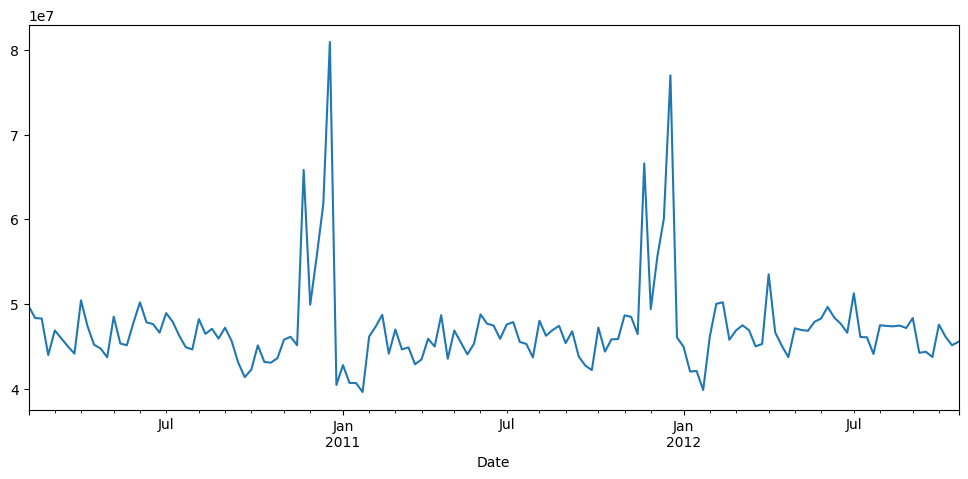

In [74]:
#Weekly sale trend
df.groupby('Date')['Weekly_Sales'].sum().plot(figsize=(12,5))

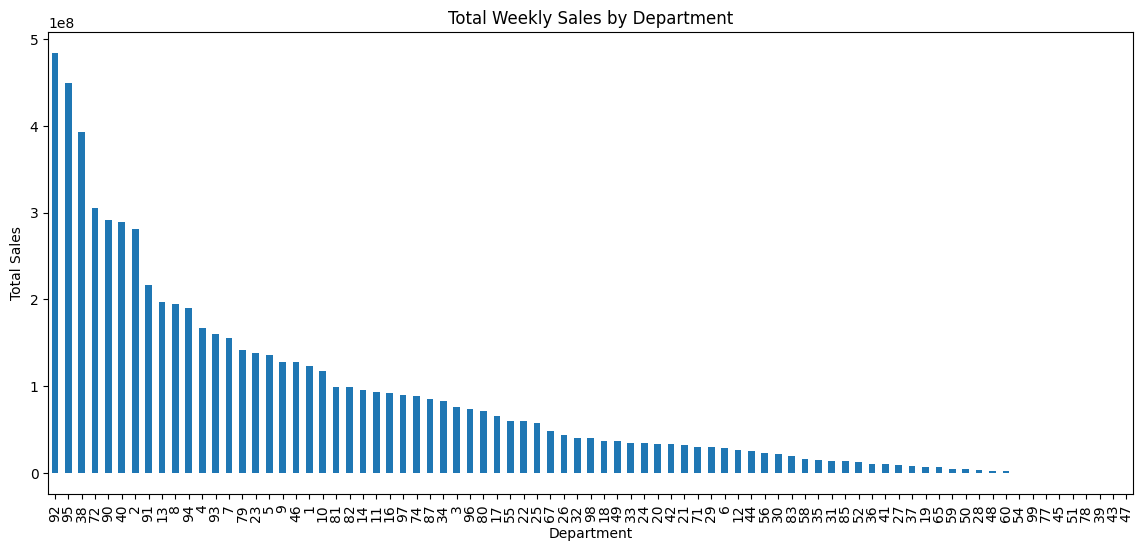

In [75]:
dept_total_sales = (
    df
    .groupby('Dept')['Weekly_Sales']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(14,6))
dept_total_sales.plot(kind='bar')

plt.title('Total Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

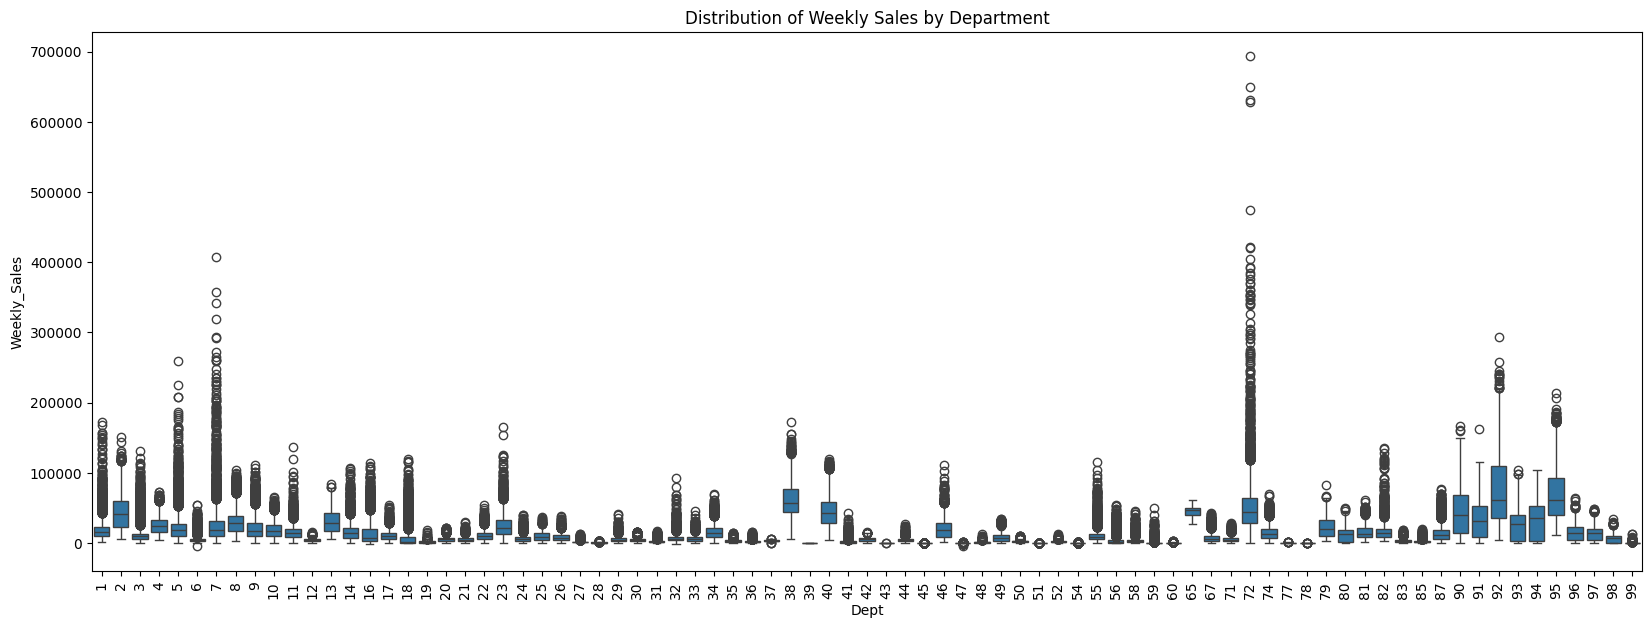

In [76]:
#ภาพรวมยอดขายรายสัปดาห์ของแต่ละ dept
plt.figure(figsize=(20,7))
sns.boxplot(
    x='Dept',
    y='Weekly_Sales',
    data=df
)
plt.title('Distribution of Weekly Sales by Department')
plt.xticks(rotation=90)
plt.show()

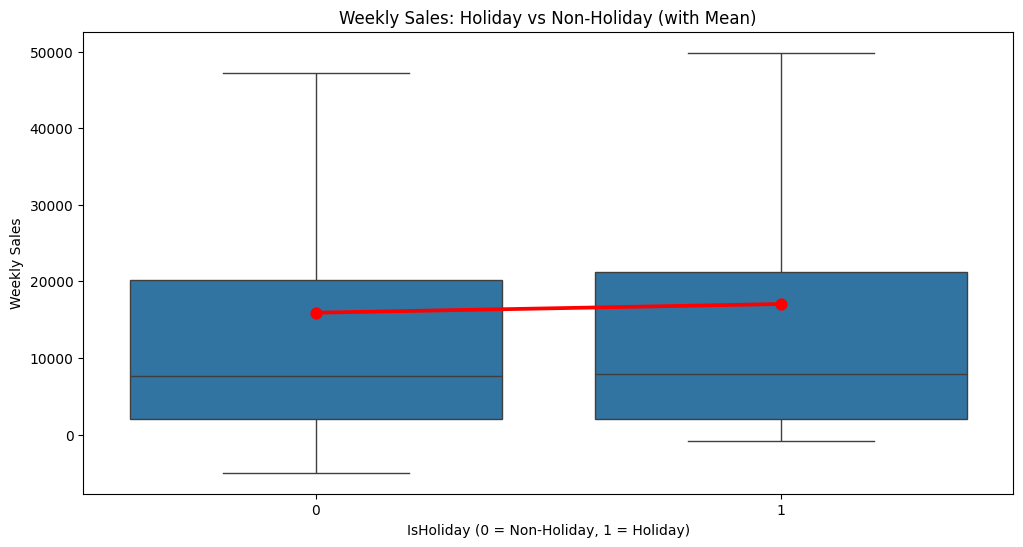

In [77]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales', showfliers=False)
sns.pointplot(data=df, x='IsHoliday', y='Weekly_Sales', color='red', estimator=np.mean)

plt.title('Weekly Sales: Holiday vs Non-Holiday (with Mean)')
plt.xlabel('IsHoliday (0 = Non-Holiday, 1 = Holiday)')
plt.ylabel('Weekly Sales')

plt.show()

จากการวิเคราะห์และเปรียบเทียบยอดขายรายสัปดาห์ระหว่าง ช่วงวันหยุด (Holiday) และ วันปกติ (Non-Holiday) พบว่า:
 ระดับยอดขายโดยรวมของทั้งสองช่วงไม่ต่างกันมากนัก
ค่ามัธยฐาน (median) ของทั้งสองกลุ่มใกล้เคียงกัน แสดงว่ายอดขายปกติของร้านค้าไม่ได้ขึ้นอยู่กับวันหยุดอย่างชัดเจน
 อย่างไรก็ตามยอดขายช่วงวันหยุดมีแนวโน้มสูงกว่าเล็กน้อย
ซึ่งอาจเกิดจากปัจจัยเสริม เช่น

 • โปรโมชั่นตามฤดูกาล
 • เหตุการณ์พิเศษ (เช่น Black Friday)

 • พฤติกรรมของผู้บริโภคที่จับจ่ายมากขึ้นในช่วงเทศกาล

 • การกระจายตัวของข้อมูลช่วง Holiday กว้างกว่าเล็กน้อย
แสดงว่าบางช่วงเทศกาลอาจมีความผันผวนของยอดขายมากกว่าวันธรรมดา


จะทําให้เห็นชัดมากขึ้นในการทํา correlation matrix

In [78]:
dept_stats = (
    df.groupby('Dept')['Weekly_Sales']
      .agg(
          median_sales='median',
          q1=lambda x: x.quantile(0.25),
          q3=lambda x: x.quantile(0.75)
      )
      .sort_values('median_sales', ascending=False)
)

dept_stats.head(10)   # Top 10  สินค้าทํารายได้สูงสุด

,median_sales,q1,q3
Dept,,,
92,61816.77,35946.810,109575.0650
95,60774.39,39962.825,92642.9250
38,57336.65,43780.375,77059.8700
65,47281.16,39835.265,49958.3850
72,44312.36,28941.910,64283.6425
40,42717.87,28347.030,58991.8900
2,41412.61,22647.905,60195.3500
90,40535.79,14515.960,68516.4500
94,35003.70,3413.840,52887.4100


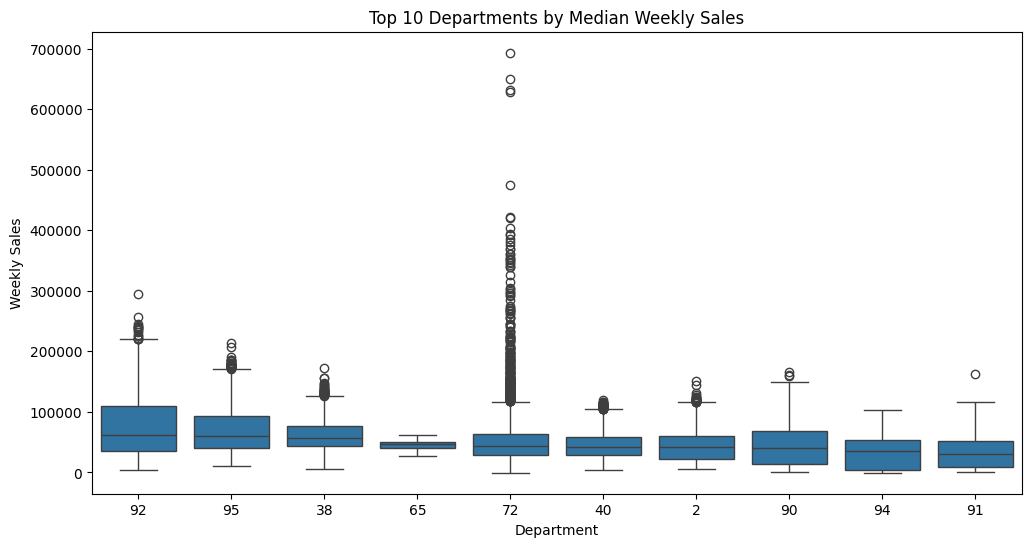

In [79]:
top10_depts = dept_stats.head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(
    x='Dept',
    y='Weekly_Sales',
    data=df[df['Dept'].isin(top10_depts)],
    order=top10_depts
)
plt.title('Top 10 Departments by Median Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

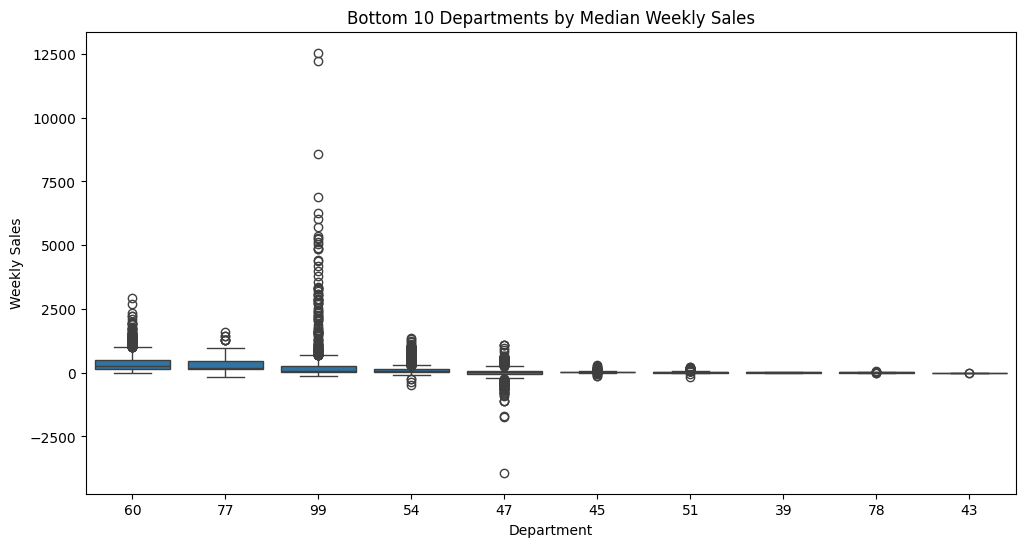

In [80]:
bottom10_depts = dept_stats.tail(10).index

plt.figure(figsize=(12,6))
sns.boxplot(
    x='Dept',
    y='Weekly_Sales',
    data=df[df['Dept'].isin(bottom10_depts)],
    order=bottom10_depts
)
plt.title('Bottom 10 Departments by Median Weekly Sales')
plt.xlabel('Department')
plt.ylabel('Weekly Sales')
plt.show()

Insight

เมื่อเรียงแผนกตามค่า median ของยอดขายรายสัปดาห์ พบว่าแผนกในกลุ่ม Top 10 มีระดับยอดขายปกติสูงกว่าแผนกอื่นอย่างชัดเจน และบางแผนกมีการกระจายของยอดขายค่อนข้างแคบ สะท้อนความสามารถในการสร้างยอดขายได้อย่างสม่ำเสมอ ในขณะที่แผนกในกลุ่ม Bottom 10 มีค่า median ต่ำ และมักพึ่งพายอดขายที่เกิดจากบางสัปดาห์เป็นหลัก แสดงให้เห็นถึงความแตกต่างของโครงสร้างรายได้ระหว่างแผนก

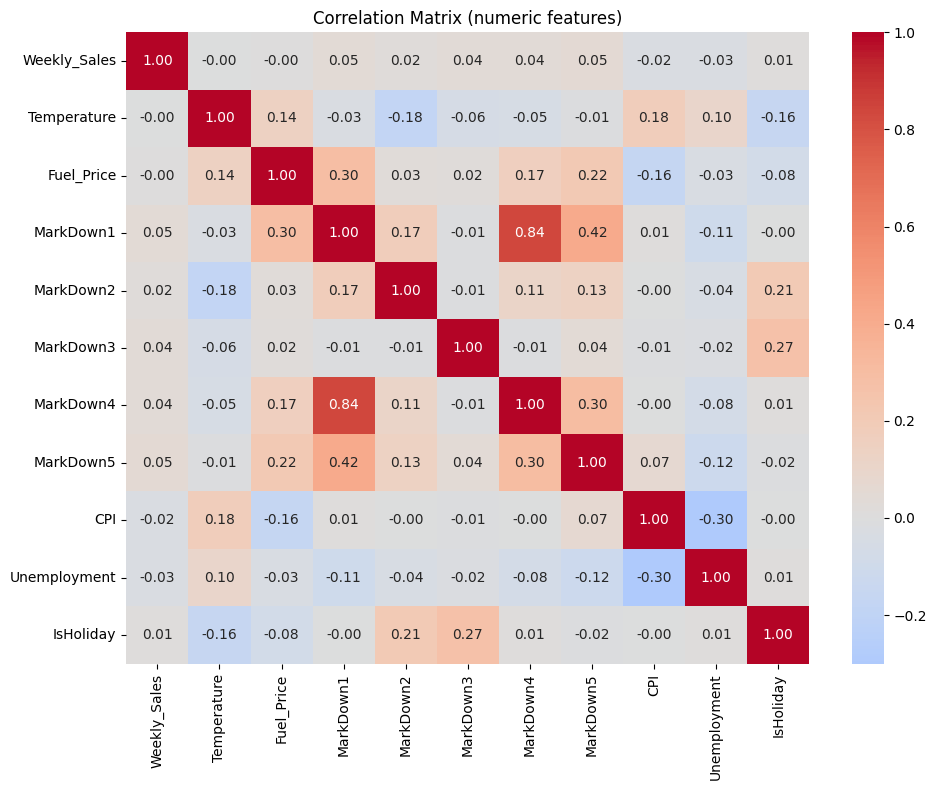

In [81]:
#วิเคราะห์เพิ่มเติมสร้าง features ที่สนใจ
num_cols = ['Weekly_Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday']
# ถ้า MarkDown คอลัมน์บางอันเป็น 0 แค่ ignore — แต่ corr ยังคำนวณได้
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix (numeric features)')
plt.tight_layout()
plt.show()

1. ยอดขายรายสัปดาห์ของ Walmart ไม่ได้ตอบสนองต่อปัจจัย numerical เช่นราคาน้ำมัน, CPI, หรืออุณหภูมิ โดยมีค่าสหสัมพันธ์น้อยกว่า 0.05 แสดงว่าโครงสร้างยอดขายถูกกำหนดโดยฤดูกาลและประเภทสินค้าเป็นหลัก

2. กลุ่มตัวแปร Promotion (MarkDown1–5) มีความสัมพันธ์กันสูง (0.30–0.84) สะท้อนว่ามักถูกใช้ร่วมกันเป็นแพ็กโปรโมชั่น แต่มีผลต่อยอดขายจริงเพียงเล็กน้อย

3. ตัวแปรเศรษฐกิจ CPI และ Unemployment มีความสัมพันธ์ทางลบค่อนข้างสูง (-0.30) แต่ไม่ส่งผลใด ๆ ต่อยอดขาย Walmart

4. ไม่พบตัวแปร numerical ใดที่สามารถใช้เป็นตัวชี้นำยอดขายได้อย่างมีนัยสำคัญ → สนับสนุนผล EDA ที่ว่า Dept และ Seasonality มีบทบาทสำคัญกว่า

# insight จากการทํา Correlation Matrix
จากการวิเคราะห์ Correlation Matrix พบว่าตัวแปรภายนอก เช่น สภาพอากาศ ราคาเชื้อเพลิง CPI อัตราว่างงาน วันหยุด และโปรโมชั่น Markdown มีความสัมพันธ์กับยอดขายในระดับต่ำมาก เมื่อเทียบกับความแตกต่างของยอดขายระหว่างแต่ละแผนก จึงสรุปได้ว่ายอดขายส่วนใหญ่ถูกกำหนดโดยตัวสินค้าและลักษณะของแต่ละ Department เองเป็นหลัก ไม่ได้ขึ้นกับปัจจัยภายนอกมากนัก

# จากInsight ดังกล่าว
ยอดขายของ Walmart ขึ้นอยู่กับคุณลักษณะของสินค้าและ Department มากกว่าปัจจัยภายนอก
เนื่องจากจากการวิเคราะห์พบว่า Department ที่ทำยอดขายสูงมีรูปแบบความต้องการเฉพาะตัวและมีพฤติกรรมยอดขายที่ชัดเจน ขณะที่ตัวแปรภายนอก เช่น อากาศ ราคาเชื้อเพลิง CPI อัตราว่างงาน หรือโปรโมชั่น มีผลเชิงสถิติต่อยอดขายเพียงเล็กน้อย

ดังนั้น กลยุทธ์สำคัญคือ การแบ่งกลุ่ม Department ตามประสิทธิภาพยอดขาย และจัดการแบบเฉพาะเจาะจง เช่น การเพิ่มสต็อกใน Dept ที่มีศักยภาพสูง การควบคุมต้นทุนใน Dept ที่ประสิทธิภาพต่ำ และใช้ข้อมูลเชิงลึกของแต่ละกลุ่มเพื่อวางแผนสินค้าและการตลาดอย่างตรงจุดมากขึ้น

# import library for model

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
#check data over view
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [84]:
df.describe()



,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328


In [85]:
df.isnull().sum()


,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


# data พร้อมใช้ เข้ากระบวนการ data preprocessing

In [86]:
#data prprocess
#เลือก feature xและ targetyกำหนดตัวแปรเป้าหมาย (y) เป็น Weekly_Sales ซึ่งเป็นยอดขายรายสัปดาห์ที่ต้องการทำนาย
#02:37 ปอนด์ ตัวแปรอิสระ (X) ประกอบด้วยข้อมูลด้านร้านค้า แผนก เศรษฐกิจ และโปรโมชั่น โดยตัดตัวแปร Date และ Weekly_Sales ออกก่อนนำไปสร้างโมเดล

X = df.drop(columns=['Weekly_Sales', 'Date'])
y = df['Weekly_Sales']

In [87]:
#ตรวจสอบความถูกต้อง
print(X.shape)
print(y.shape)
X.head()


#ผลการตรวจสอบพบว่าข้อมูล feature (X) และ target (y) มีจำนวนแถวเท่ากัน และไม่มีข้อมูลสูญหาย โดย feature ที่เหลือมีทั้งหมด 14 ตัวแปร ซึ่งพร้อมสำหรับขั้นตอนการทำ data preprocessing

(421570, 14)
(421570,)


,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [88]:
#แยก Numeric / Categorical Features

# แยกตัวแปรเชิงตัวเลข (numeric features)
num_features = [
    'Store', 'Dept', 'IsHoliday',
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
    'CPI', 'Unemployment', 'Size'
]

# แยกตัวแปรเชิงหมวดหมู่ (categorical features)
cat_features = ['Type']

#Numeric features เป็นตัวเลขที่มีขนาดและช่วงค่าต่างกันมาก เช่น Temperature ~ 0–100  Size ~ หลักแสน  จำเป็นต้อง Standardize เพื่อให้โมเดลเรียนรู้ได้อย่างดี

In [89]:
#ตรวจสอบความถูกต้อง
print("Numeric features:", num_features)
print("Categorical features:", cat_features)

Numeric features: ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
Categorical features: ['Type']


In [90]:
# กําหนด preprocessing สําหรับข้อมูลแต่ละประเภท

# preprocessing สำหรับ numeric features
numeric_transformer = StandardScaler()

# preprocessing สำหรับ categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

#Numeric features
 #ใช้ StandardScaler เพื่อให้ตัวแปรทุกตัวอยู่ในสเกลเดียวกัน (mean = 0, std = 1)
  #ช่วยให้ Linear model เรียนรู้ได้มีประสิทธิภาพมากขึ้น

#Categorical features
  #ใช้ OneHotEncoder handle_unknown='ignore' เพื่อป้องกัน error หากพบค่าที่ไม่เคยเห็นตอน train

# สรุป
#ตัวแปรเชิงตัวเลขถูกปรับสเกลด้วย StandardScaler และตัวแปรเชิงหมวดหมู่ถูกแปลงด้วย One-Hot Encoding

In [91]:
# รวม preprocessing ด้วย ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# 'num' processing สําหรับ ตัวแปรเชิดตัวเลข
# 'cat' processing สําหรับ ตัวแปรเชิงหมวดหมู่

In [92]:
#ทดลอง fit_transform เพื่อตรวจสอบ
X_processed = preprocessor.fit_transform(X)
X_processed.shape
#จํานวนcolumnเพิ่มขึ้นจากการencodeding

#สรุป
#ในขั้นตอนนี้ได้ทำการสร้าง ColumnTransformer เพื่อจัดการ preprocessing ของข้อมูล โดยใช้ StandardScaler สำหรับตัวแปรเชิงตัวเลข และ OneHotEncoder สำหรับตัวแปรเชิงหมวดหมู่ เพื่อเตรียมข้อมูลให้เหมาะสมสำหรับการนำไปสร้างโมเดลเชิงเส้นในขั้นตอนถัดไป

(421570, 16)

In [93]:
# สร้าง pipeline
model = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('regressor', LinearRegression())
    ]
)
#Pipeline ถูกสร้างขึ้นเพื่อรวมขั้นตอนการเตรียมข้อมูลและการสร้างโมเดลเข้าด้วยกัน ช่วยให้กระบวนการเรียนรู้ของโมเดลเป็นไปอย่างถูกต้องและลดความเสี่ยงของ data leakag

In [94]:
#ตรวจสอบ
model.named_steps

# pipelineถูกสร้างแล้ว
#สรุป
#ในขั้นตอนนี้ได้ทำการสร้าง Pipeline โดยรวมขั้นตอนการ preprocessing และการสร้างโมเดล Linear Regression เข้าไว้ด้วยกัน เพื่อให้กระบวนการฝึกและทำนายเป็นไปอย่างเป็นระบบ และสามารถนำไปใช้ร่วมกับ GridSearchCV ได้ในขั้นตอนถัดไป

{'preprocess': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['Store', 'Dept', 'IsHoliday', 'Temperature',
                                   'Fuel_Price', 'MarkDown1', 'MarkDown2',
                                   'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
                                   'Unemployment', 'Size']),
                                 ('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['Type'])]),
 'regressor': LinearRegression()}

In [95]:
# แยกข้อมูล Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
#กำหนดค่า random_state เพื่อให้การแบ่งข้อมูลสามารถทำซ้ำได้และให้ผลลัพธ์สม่ำเสมอ

In [96]:
# ตรวจสอบขนาดข้อมูลหลังแยก
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
# จํานวนแถว X Y ตรงกันถูกต้อง

#สรุป  ในขั้นตอนนี้ได้ทำการแบ่งข้อมูลออกเป็นชุดฝึก (training set) และชุดทดสอบ (testing set) โดยใช้สัดส่วน 80:20 เพื่อใช้ชุดฝึกสำหรับการเรียนรู้ของโมเดล และใช้ชุดทดสอบสำหรับประเมินประสิทธิภาพของโมเดลกับข้อมูลที่ไม่เคยเห็นมาก่อน

X_train shape: (337256, 14)
X_test shape: (84314, 14)
y_train shape: (337256,)
y_test shape: (84314,)


In [97]:
# train model
model.fit(X_train, y_train)
# ทํานายผล
y_pred = model.predict(X_test)
#Evaluate โมเดล (RMSE & R²)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("RMSE:", rmse)
print("R² Score:", r2)



RMSE: 21759.354187435456
R² Score: 0.09205017897274803


# สรุปผล
หลังจากทำการฝึกโมเดล Linear Regression ด้วยชุดข้อมูลฝึก และประเมินผลด้วยชุดข้อมูลทดสอบ พบว่าโมเดลมีค่า RMSE ประมาณ 21,759 และค่า R² ประมาณ 0.093 ซึ่งแสดงให้เห็นว่าโมเดลสามารถอธิบายความแปรปรวนของยอดขายรายสัปดาห์ได้ในระดับค่อนข้างต่ำ สะท้อนว่าความสัมพันธ์ระหว่างตัวแปรอิสระที่ใช้กับยอดขายยังไม่เชิงเส้นมากนัก และอาจจำเป็นต้องใช้โมเดลหรือฟีเจอร์เพิ่มเติมเพื่อเพิ่มประสิทธิภาพในการพยากรณ์

ผลลัพธ์นี้ “ไม่ถือว่าแย่” สำหรับ Linear Regression
เพราะ:

 • ข้อมูลยอดขายมีความซับซ้อนสูง

 • มี outliers จำนวนมาก

 • ความสัมพันธ์ไม่เชิงเส้น

# ทำ GridSearchCV

In [98]:
#สร้าง Pipeline สำหรับ Ridge และ Lasso

ridge_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Ridge())
])

lasso_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', Lasso(max_iter=10000))
])

In [99]:
#กำหนด Parameter Grid
# Ridge
ridge_param_grid = {
    'model__alpha': [0.1, 1, 10, 50, 100]
}
#  Lasso
lasso_param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10]
}

In [100]:
#สร้าง GridSearchCV
# Ridge GridSearchCV
ridge_gs = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Lasso GridSearch

lasso_gs = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=lasso_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

In [101]:
ridge_gs.fit(X_train, y_train)
lasso_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Store',
                                                                          'Dept',
                                                                          'IsHoliday',
                                                                          'Temperature',
                                                                          'Fuel_Price',
                                                                          'MarkDown1',
                                                                          'MarkDown2',
                                                                          'MarkDown3',
                                                                          'MarkDown4',
                                                                          'MarkDown5',
                                                                          'CPI',
                                                                          'Unemployment',
                                                                          'Size']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Type'])])),
                                       ('model', Lasso(max_iter=10000))]),
             n_jobs=-1, param_grid={'model__alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [102]:
# ดูผลลัพธ์
# Ridge
print("Ridge Best Parameters:", ridge_gs.best_params_)
print("Ridge Best RMSE:", -ridge_gs.best_score_)

#Lasso
print("Lasso Best Parameters:", lasso_gs.best_params_)
print("Lasso Best RMSE:", -lasso_gs.best_score_)


Ridge Best Parameters: {'model__alpha': 50}
Ridge Best RMSE: 21644.511761900696
Lasso Best Parameters: {'model__alpha': 10}
Lasso Best RMSE: 21644.450071543684


# สรุป
 Ridge
  
  best alpha = 50
  
  
  CV RMSE ≈ 21,644.51


 Lasso
  
  
  best alpha = 10
  
  
  CV RMSE ≈ 21,644.45

➡️ Lasso ดีกว่า Ridge นิดเดียว (แทบไม่ต่าง)

In [103]:
#ดึง best model

ridge_best = ridge_gs.best_estimator_
lasso_best = lasso_gs.best_estimator_

# ทํานายบน test set
y_pred_ridge = ridge_best.predict(X_test)
y_pred_lasso = lasso_best.predict(X_test)

In [104]:
#Evaluate ด้วย RMSE และ R²

# Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge RMSE:", rmse_ridge)
print("Ridge R2:", r2_ridge)

print("Lasso RMSE:", rmse_lasso)
print("Lasso R2:", r2_lasso)

Ridge RMSE: 21759.356927348024
Ridge R2: 0.09204995031676322
Lasso RMSE: 21759.235560651352
Lasso R2: 0.09206007879540568


  # วิเคราะห์ผล
   ค่า RMSE ของทั้งสองโมเดลใกล้เคียงกันมาก
  ค่า R² ต่ำ (~0.09) แสดงว่าโมเดลอธิบายความแปรปรวนของยอดขายได้จำกัด


 Lasso ให้ผล ดีกว่าเล็กน้อย และมีข้อดีคือ
 ทำ feature selection อัตโนมัติ
  โมเดลเรียบง่าย (บาง coefficient ถูกดันเป็น 0)

 Final Model ที่เลือก

เลือกใช้ Lasso Regression
เนื่องจากให้ผลใกล้เคียง Ridge แต่มีความเรียบง่ายและเหมาะกับการตีความเชิงธุรกิจมากกว่า



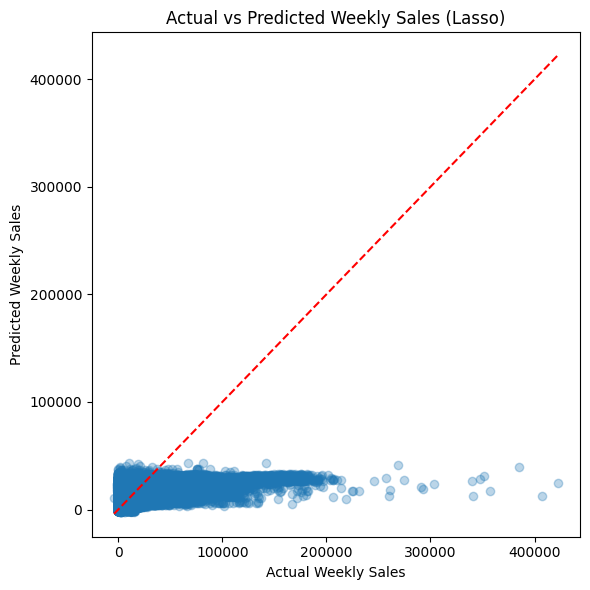

In [105]:
#Plot: Actual vs Predicted (สำหรับ Final Model = Lasso
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Weekly Sales (Lasso)")
plt.tight_layout()
plt.show()

# อธิบายกราฟ
จากกราฟ Actual vs Predicted พบว่าค่าที่โมเดลทำนายมีแนวโน้มกระจายรอบเส้นอ้างอิง (y = x) แต่ยังมีความคลาดเคลื่อนค่อนข้างมาก โดยเฉพาะในช่วงยอดขายสูง สะท้อนว่าโมเดลเชิงเส้นยังไม่สามารถจับความซับซ้อนของข้อมูลได้ทั้งหมด

# Conclusion

งานนี้ได้ทำการพัฒนาโมเดลทำนายยอดขายรายสัปดาห์โดยใช้ Linear Regression, Ridge และ Lasso ร่วมกับกระบวนการ data preprocessing ผ่าน Pipeline และ ColumnTransformer
ผลการทดลองพบว่า Lasso Regression ให้ผลลัพธ์ดีที่สุดเล็กน้อยบน test set โดยมีค่า RMSE ประมาณ 21,759 และ R² ประมาณ 0.09 ซึ่งสะท้อนว่าโมเดลสามารถอธิบายแนวโน้มข้อมูลได้บางส่วน แต่ยังมีข้อจำกัดในการทำนายที่แม่นยำ

# Limitation

 1. โมเดลที่ใช้เป็น โมเดลเชิงเส้น ซึ่งอาจไม่เหมาะกับความสัมพันธ์ที่ซับซ้อนของยอดขาย
 2. ยังไม่มีการสร้าง feature เชิงเวลา เช่น lag features หรือ rolling statistics
 3. ค่า R² ที่ต่ำแสดงว่ายังมีปัจจัยอื่นที่ไม่ได้รวมอยู่ในโมเดล เช่น โปรโมชันเชิงลึก หรือพฤติกรรมลูกค้า






## Advanced experiment / Extension
ทดลองใช้ XGBoost + lag feature

In [125]:
df_lag = df.sort_values(['Store', 'Dept', 'Date']).copy()
df_lag['lag_1'] = df_lag.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df_lag['lag_2'] = df_lag.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)
df_lag['lag_4'] = df_lag.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(4)
# สร้าง lag เพื่อให้ model เรียนรู้ patturn เชิงเวลาได้ดีขึ้น

In [127]:
#ลบแถวที่สร้างlag ไม่ได้
df_lag = df_lag.dropna().reset_index(drop=True)

#แยก piprline ใหม่
X_lag = df_lag.drop(columns=['Weekly_Sales', 'Date'])
y_lag = df_lag['Weekly_Sales']


In [128]:
print(X_lag.shape)
print(y_lag.shape)

X_lag[['lag_1','lag_2','lag_4']].head()
#ตรวจสอบ lag

(408436, 17)
(408436,)


,lag_1,lag_2,lag_4
0,19403.54,41595.55,24924.50
1,21827.90,19403.54,46039.49
2,21043.39,21827.90,41595.55
3,22136.64,21043.39,19403.54
4,26229.21,22136.64,21827.90


In [129]:
X_train_lag, X_test_lag, y_train_lag, y_test_lag = train_test_split(
    X_lag, y_lag, test_size=0.2, random_state=42
)
#ColumnTransformer + OneHot + Scaler

In [131]:

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_pipeline.fit(X_train_lag, y_train_lag)
y_pred_xgb = xgb_pipeline.predict(X_test_lag)


In [135]:
# evaluate
mse_xgb = mean_squared_error(y_test_lag, y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_lag, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)


XGBoost RMSE: 6891.13519425289
XGBoost R2: 0.9079555730121356


# Conclusion

จากการทดลองพบว่าโมเดลเชิงเส้นเหมาะสำหรับใช้เป็น baseline
แต่ไม่สามารถอธิบายความซับซ้อนของข้อมูลยอดขายได้ดี
การใช้ XGBoost ร่วมกับ lag features ช่วยเพิ่มความแม่นยำในการพยากรณ์อย่างมีนัยสำคัญ

# Future Work

ใช้ time-series cross validation

เพิ่ม rolling statistics เช่น moving average

วิเคราะห์ feature importance ด้วย SHAP